In [48]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.layers.normalization import BatchNormalization
import numpy as np

In [37]:
batch_size = 128
num_classes = 10
epochs = 5

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [8]:
x_train.shape

(60000, 28, 28)

4


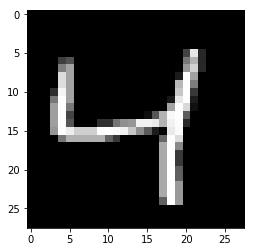

In [10]:

plt.imshow(x_train[2],cmap='gist_gray')
print(y_train[2])

In [27]:
img_rows, img_cols, img_chan = 28, 28, 1

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

In [28]:
x_train.shape

(60000, 28, 28, 1)

In [29]:
x_train.max()

0.003921569

In [19]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 1, 28, 28)
60000 train samples
10000 test samples


In [21]:
x_train.max()

0.003921569

In [23]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [24]:
y_train[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [35]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28,28,1), activation='relu'))
BatchNormalization(axis=-1)

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
BatchNormalization(axis=-1)

model.add(Conv2D(64,(3, 3), activation='relu'))
BatchNormalization(axis=-1)

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
# Fully connected layer

BatchNormalization()
model.add(Dense(512, activation='relu'))
BatchNormalization()

model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [36]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1024)              0         
__________

In [38]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 239s 4ms/step - loss: 0.8874 - acc: 0.6807 - val_loss: 0.1393 - val_acc: 0.9544
Epoch 2/5
60000/60000 [==============================] - 227s 4ms/step - loss: 0.1220 - acc: 0.9618 - val_loss: 0.0915 - val_acc: 0.9691
Epoch 3/5
60000/60000 [==============================] - 223s 4ms/step - loss: 0.0803 - acc: 0.9747 - val_loss: 0.0683 - val_acc: 0.9786
Epoch 4/5
60000/60000 [==============================] - 225s 4ms/step - loss: 0.0629 - acc: 0.9800 - val_loss: 0.0498 - val_acc: 0.9838
Epoch 5/5
60000/60000 [==============================] - 217s 4ms/step - loss: 0.0523 - acc: 0.9833 - val_loss: 0.0439 - val_acc: 0.9859


In [41]:

score = model.evaluate(x_train, y_train)
print()
print('Test accuracy: ', score[1])

60000/60000 [==============================] - 64s 1ms/step

Test accuracy:  0.9905166666666667


In [62]:
np.argmax(y_test[0])

2

In [56]:
pred = np.asarray([x_test[0],x_test[1]])
pred.shape

(2, 28, 28, 1)

In [57]:
p = model.predict(pred)

In [61]:
np.argmax(p[1])

2